In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../../data/curated/individual_property_final.csv')
df.isnull().sum()

Address                             0
Cost                            18636
Property Type                       0
Bedrooms                            0
Bathrooms                           0
Latitude                            0
Longitude                           0
Closest Gov Secondary School        0
Age under 20                        0
Age 20-39                           0
Age 40-59                           0
Age 60+                             0
Postcode                            0
CBD Distance                        0
Train Distance                      0
Electricity Distance                0
Hospital Distance                   0
Library Distance                    0
Park Distance                       0
Tourist Attraction Distance         0
Grocery Distance                    0
Year                                0
SA2_CODE21                          0
Population                          0
Income                              0
LGA_CODE24                          0
Incidents Re

In [3]:
# Select features for predicted
df = df.drop(columns=['Address', 'Latitude', 'Longitude', 'Postcode', 'SA2_CODE21', 'LGA_CODE24', 'Suburb'], axis=1)

categorical_columns = ['Property Type','Closest Gov Secondary School']
# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [4]:
df_train = df[(df['Year'] >= 2015) & (df['Year'] <= 2024)]
df_predict = df[(df['Year'] >= 2025) & (df['Year'] <= 2027)]

In [5]:
X = df_train.drop(columns=['Cost'])
y = df_train['Cost']

In [6]:
seed = 37 

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

In [8]:
rf_model = RandomForestRegressor(random_state=seed)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=37)

In [9]:
y_pred = rf_model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse}')

Validation RMSE: 57.49622981306737


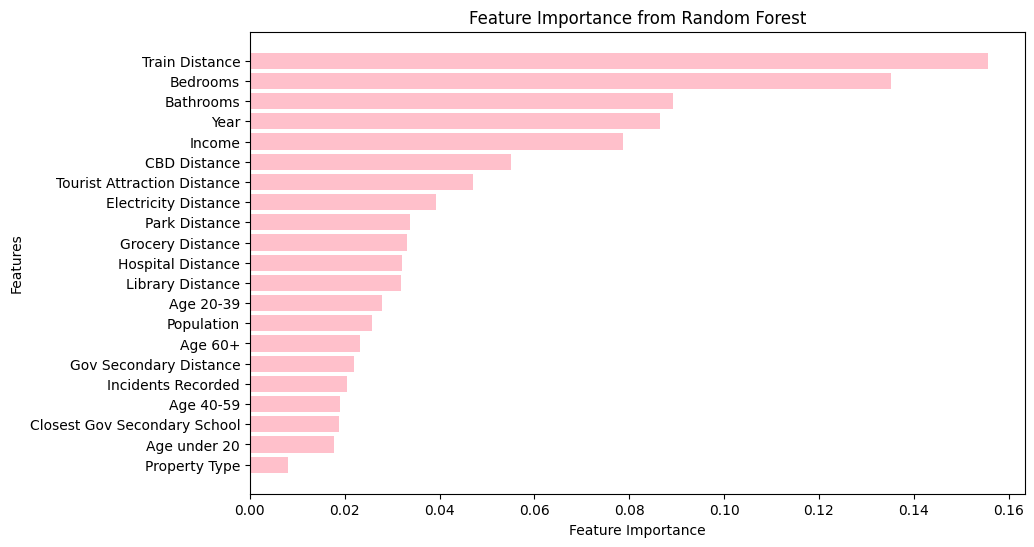

In [10]:
feature_importance = rf_model.feature_importances_

feature_names = X.columns  # Assuming X is a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='pink')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

Now, go to next model(s) and use random forest as a baseline model for prediction.